# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_c

----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
/Users/mwilko777/Desktop/Project/Software Artifact/notebooks/neural_network/../../src/datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing i

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'39Q', 'OE-', '623', '80U', '978', '05R', '354', '832', '65W', '77X', '02T', '41Y', '347', 'SBH', 'CM-', 'G-T', 'CSM', 'REN', '55W', 'CBO', 'UR-', '391', '57W', '905', 'AQU', '033', 'VO-', 'GLO', '53X', '11U', '489', '02U', '37X', '170', '706', '746', 'DA-', '987', '723', '-LB', '164', '02Z', '63U', '09W', '225', '137', '831', '958', 'EI-', 'OCI', 'T-D', '196', '108', '430', 'LIT', '67S', '502', 'TK-', '08Y', '572', '675', '-PL', '344', 'S-T', 'DRE', 'PER', '28W', '239', '15T', '56X', '05W', 'CAT', 'AR-', '934', '89Y', '051', 'D36', 'JB-', '6-9', '15U', 'EM-', 'VM-', '31Z', 'PW-', '903', 'TH-', '65Y', '45T', '599', '165', '60Z', 'SOU', 'LP-', '18V', '751', '957', '52W', '524', '26Y', '541', '13Z', '055', 'BFS', '071', 'ND-', '074', '707', 'ORE', '82Z', '94X', '07Z', '23V', 'R-T', 'ATE', '74U', '30T', '86Z', '-01', '18U', '44T', '50X', '33V', '434', '776', '157', 'OV-', 'OO-', '742', '79T', '303', 'AP-', '46Y', '620', 'RW-', '199', '46Z', 'AHF',

In [6]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [7]:
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('UND'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

UND


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [8]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
UND-026-0008Z 49    UND-026-0008Z         320000  3.890424
UND-026-0012Z 191   UND-026-0012Z        2224000  3.164748
UND-026-0015Z 324   UND-026-0015Z         380000  3.186842
              362   UND-026-0015Z         408000  3.561399
UND-026-0016Y 381   UND-026-0016Y         320000  4.035946
UND-026-0020Z 514   UND-026-0020Z         360000  4.646387
UND-026-0022Z 558   UND-026-0022Z        1344000  3.518711
UND-026-0024Z 615   UND-026-0024Z         180000  3.049619
UND-026-0031Y 748   UND-026-0031Y        1080000  3.225644
              749   UND-026-0031Y        1040000  3.048499
UND-026-0036Z 942   UND-026-0036Z         180000  3.483565
UND-026-0037Z 983   UND-026-0037Z         296000  5.443305
UND-026-0049Y 1223  UND-026-0049Y         140000  3.952076
UND-026-0055Y 1302  UND-026-0055Y         234000  3.166945
UND

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_25715/1363007664.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

In [11]:
# all products order quants for defined customer list (2022-2025)
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# normalize data
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_val_trans = scaler.transform(X_val)

In [12]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()

Train Shape: (2812, 260), Validation Shape: (704, 260)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [13]:
# the top 10 (or change) products by total actual order quantity
top_products = df.groupby('ProductNumber')['OrderQuantity'].sum().nlargest(1)

# extract top product code rows from the original df
top_prods_df = df[df['ProductNumber'].isin(top_products.index)]

# Extract top product numbers
top_product_numbers = top_products.index.tolist()  # List of top product numbers

top_prods_df.head()

unique_order_years = custom_code_df['order_year'].unique()
print(unique_order_years)

[2022 2024 2023 2021 2025]


In [14]:
# define features and target
features = ['ProductNumber', 'order_month', 
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'

# filter the top products
tp_X = top_prods_df[features]  # Features from top products
tp_y = top_prods_df[target]    # Target variable

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from model_utils import *

In [ ]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
customer_total['DetailedOrderDate'] = pd.to_datetime(
    customer_total['order_year'].astype(str) +
    customer_total['order_week'].astype(str).str.zfill(2) +
    customer_total['order_weekday'].astype(str),
    format='%Y%W%w'
)

# Filter the data for December 2024 using DetailedOrderDate
dec_2024_data = customer_total[
    (customer_total['DetailedOrderDate'].dt.year == 2024) &
    (customer_total['DetailedOrderDate'].dt.month == 12)
]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Separate numeric and categorical features
categorical_features = ['ProductNumber']  # You may have other categorical features as well
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Define transformations
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numeric values
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Combine transformations for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Create pipeline that first applies preprocessing and then fits the model
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('mlp', MLPRegressor(hidden_layer_sizes=(128, 64), learning_rate_init=0.01,
                         max_iter=1000, early_stopping=True, random_state=42))  # Neural Network
])

# Split data
tp_X_train, tp_X_val, tp_y_train, tp_y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
mlp_pipeline.fit(tp_X_train, tp_y_train)

# Evaluate the model
train_metrics = evaluate_model(mlp_pipeline, tp_X_train, tp_y_train, 'TRAINING')
test_metrics = evaluate_model(mlp_pipeline, tp_X_val, tp_y_val, 'TEST')

# Store metrics
metrics = {'Neural Network': test_metrics}

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]

# Print final metrics
print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


ValueError: Specifying the columns using strings is only supported for dataframes.

NameError: name 'mlp' is not defined

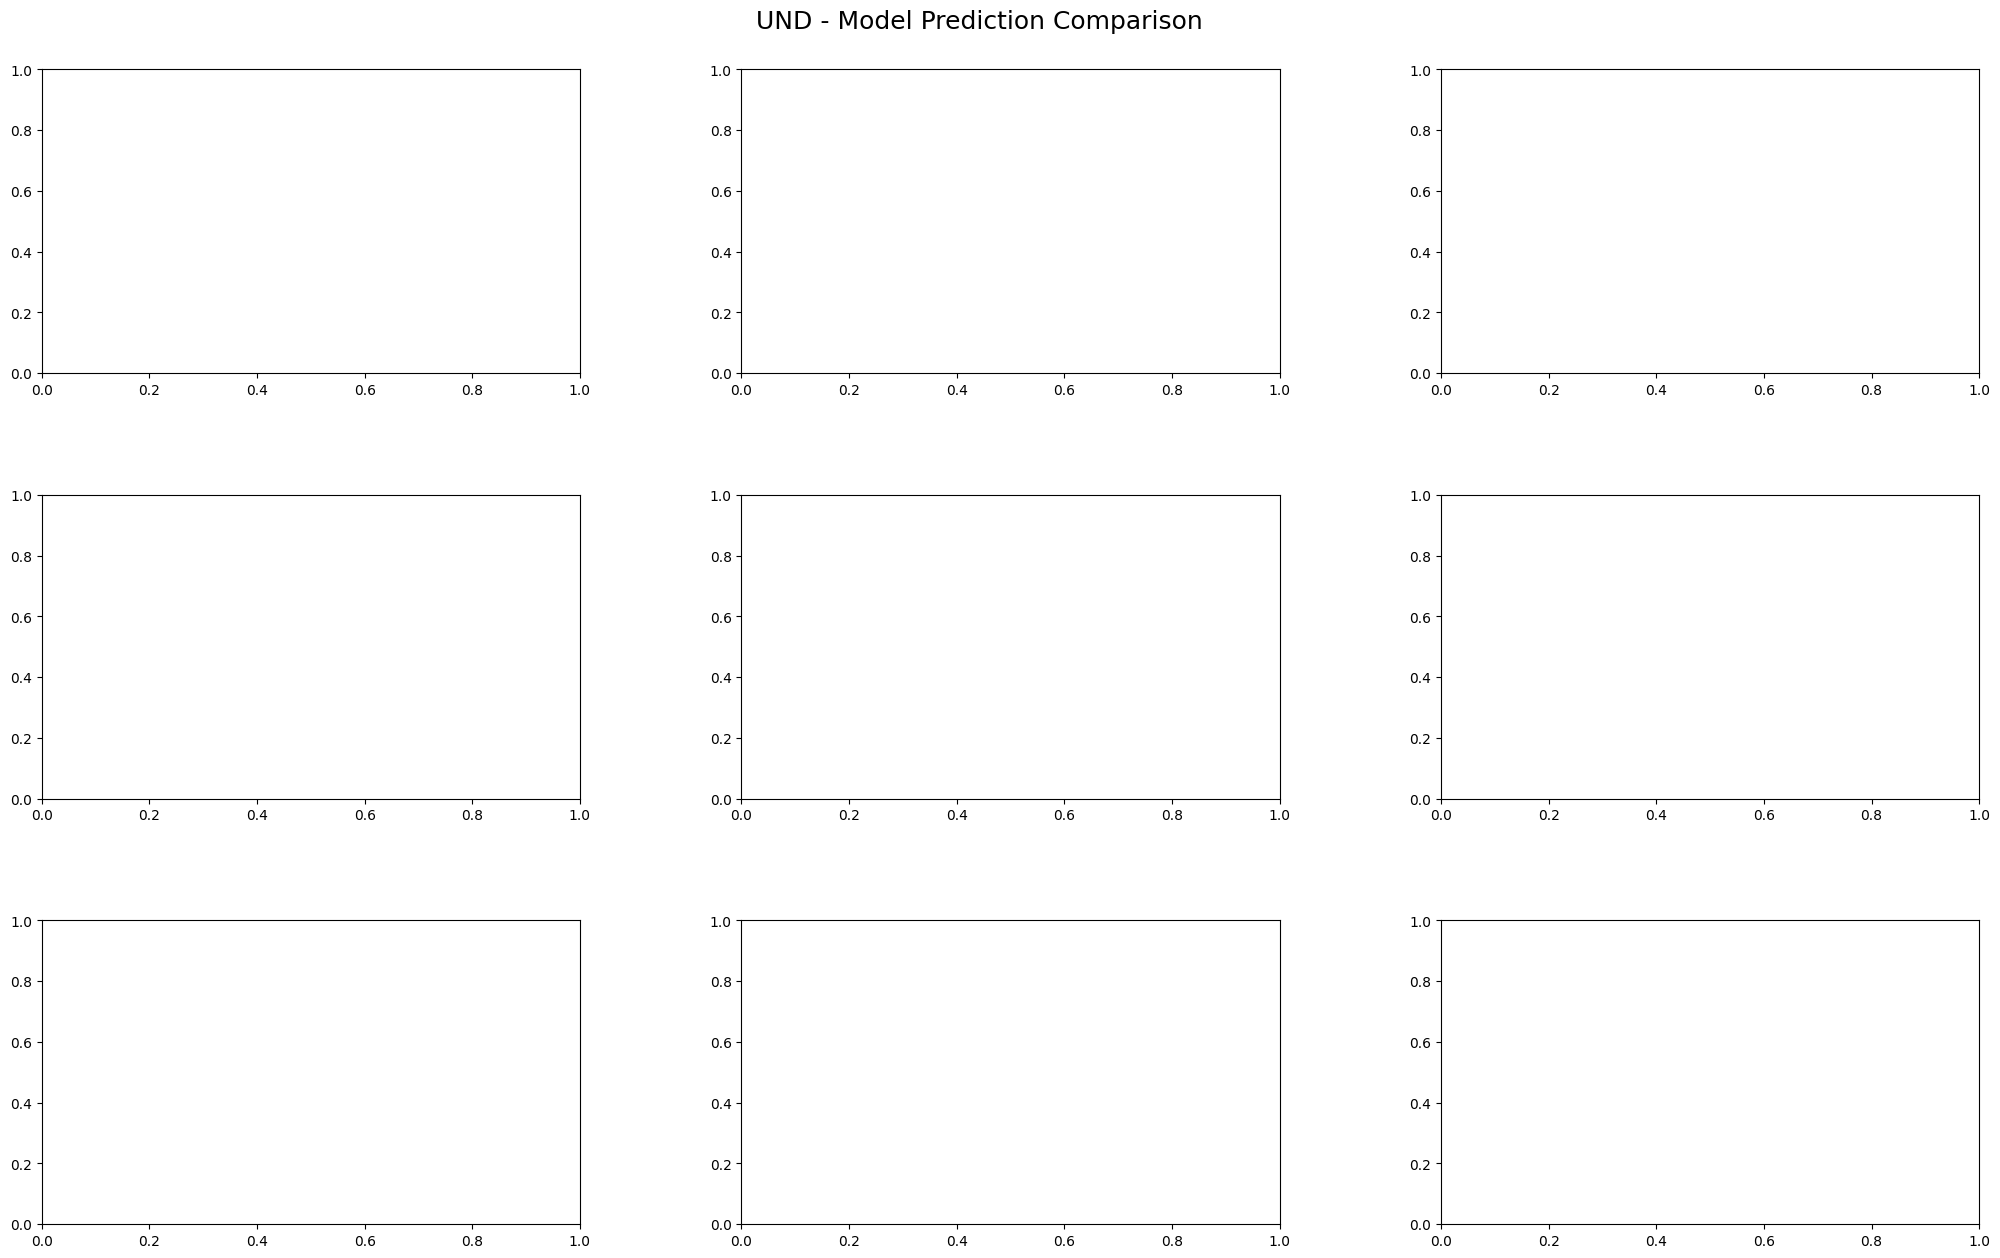

In [ ]:
# Plotting code fix
import matplotlib.dates as mdates
import seaborn as sns

plot_dates = customer_total.loc[total_y_val.index, 'DetailedOrderDate']  # Changed X to df
if not pd.api.types.is_datetime64_any_dtype(plot_dates):
    plot_dates = pd.to_datetime(plot_dates)

# Create main comparison plots
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
fig.suptitle(f"{custom_ref} - Model Prediction Comparison", 
             fontsize=18, y=0.92)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

models = {
    "Neural Network": mlp.predict(tp_X_val_transformed)
}

for row, (model_name, y_pred) in enumerate(models.items()):
    # Time Series Comparison
    ax = axes[row, 0]
    sns.lineplot(x=plot_dates, y=total_y_val, label='Actual', ax=ax)
    sns.lineplot(x=plot_dates, y=y_pred, label='Predicted', ax=ax)
    ax.set_title(f'{model_name} - Time Series', fontsize=12)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Residual Plot
    ax = axes[row, 1]
    residuals = total_y_val - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_title(f'{model_name} - Residuals', fontsize=12)
    ax.set_xlabel('Predicted Values')
    
    # Actual vs Predicted
    ax = axes[row, 2]
    max_val = max(total_y_val.max(), y_pred.max())
    
    # Scatter plot with custom colors
    sns.scatterplot(x=total_y_val, y=y_pred, color='#4C72B0', alpha=0.6, ax=ax, label='Predicted')
    sns.scatterplot(x=total_y_val, y=total_y_val, color='#ff8000', alpha=0.3, ax=ax, label='Actual')  # Perfect line as reference
    
    # 1:1 reference line
    ax.plot([0, max_val], [0, max_val], 'r--', linewidth=1)
    
    ax.set_title(f'{model_name} - Accuracy', fontsize=12)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Monthly trend plot fix
fig2, ax2 = plt.subplots(figsize=(15, 6))
monthly_data = df.loc[total_y_val.index, ['order_month']].copy()  # Changed X to df
monthly_data['Actual'] = total_y_val.values

for model_name, y_pred in models.items():
    monthly_data[f'Pred_{model_name}'] = y_pred
    sns.lineplot(x='order_month', y=f'Pred_{model_name}', 
                data=monthly_data, label=model_name, ax=ax2)

sns.lineplot(x='order_month', y='Actual', data=monthly_data, 
            label='Actual', ax=ax2, color='black', linestyle='--')
ax2.set_title(f'{custom_ref} - Monthly Trend Comparison', fontsize=14)
# ax2.xaxis.set_major_locator(mdates.MonthLocator())
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()